### 파이썬 머신러닝
## 텍스트 데이터 다루기
---
# IMDb 리뷰 - 여러 단어로 만든 BOW (n-gram)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
imdb_train, imdb_test = np.load('imdb.npy')

text_train = [s.decode().replace('<br />', '') for s in imdb_train.data]
y_train = imdb_train.target

### 여러 단어로 만든 BOW (n-gram)
- 연속된 여러 단어를 하나로 취급
- 단어(token) 하나 uni-gram, 단어 두개 bi-gram, 단어 세개 tri-gram, 단어 n개 n-gram
- ngram_range=[token_min, token_max] 옵션을 사용하는데, 메모리 에러가 발생할 수 있다.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2))
X_train = vect.fit_transform(text_train)

In [4]:
type(vect.vocabulary_), len(vect.vocabulary_)

(dict, 1522634)

In [38]:
fn = np.array(vect.get_feature_names())
fn[::100000]

array(['00', 'appreciating the', 'brazil minha', 'contessa',
       'early actresses', 'for cheap', 'heist thing', 'it disheartening',
       'mainly related', 'nobody writes', 'pheobe buffay', 'rifle much',
       'solved and', 'the doorstep', 'unintelligible half',
       'work optimally'], dtype='<U89')

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(C=10), X_train, y_train)
scores

array([0.88672906, 0.89416847, 0.89354297])

- 계수 조사를 위해 모델을 만든다
- <font color="red">아래 분류 작업은 아주 시간이 오래 걸린다</font>

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10) # 교재 414 쪽 참조
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
model.coef_[0].shape

(1522634,)

In [13]:
model.coef_[0].max()

1.7085167517382418

In [14]:
model.coef_[0].min()

-2.1481461778974604

In [15]:
w = model.coef_[0]
w_sorted = np.sort(w)
w_sorted[:10]

array([-2.14814618, -1.98020806, -1.91502312, -1.78839309, -1.68570986,
       -1.51918864, -1.49862478, -1.49203992, -1.47498124, -1.39155244])

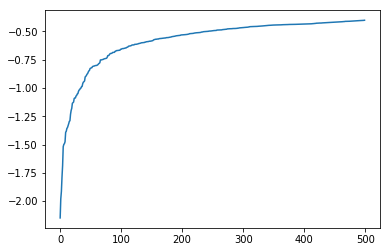

In [55]:
plt.plot(w_sorted[:500])

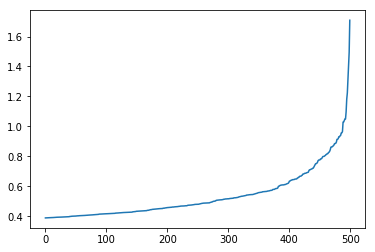

In [57]:
plt.plot(w_sorted[-500:])

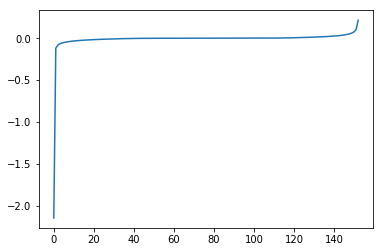

In [56]:
plt.plot(w_sorted[::10000])

- argsort()

In [21]:
nums = np.random.randint(0, 100, size=5)
nums

array([41,  3,  4, 25, 68])

In [22]:
np.sort(nums)

array([ 3,  4, 25, 41, 68])

In [23]:
np.argsort(nums)

array([1, 2, 3, 0, 4], dtype=int64)

In [27]:
fn[100000]

'appreciating the'

In [28]:
w[100000]

0.0035644911195093494

In [29]:
w_sort_pos = np.argsort(w)
w_sort_pos[-10:]

array([ 874526,  560682,  665584,  203000,   59411,  420060, 1256852,
       1496779,  992871,  442156], dtype=int64)

In [30]:
fn[442156] # 가중치가 가장 높은 속성 이름

'excellent'

In [31]:
w_sort_pos[:10]

array([1502853,  133566,  192467, 1444769,  368303, 1281490, 1020318,
       1019538,  368109, 1502420], dtype=int64)

In [32]:
fn[1502853] # 가중치가 가장 낮은 속성 이름

'worst'

In [35]:
pos

array([1502853,  133566,  192467, 1444769,  368303, 1281490, 1020318,
       1019538,  368109, 1502420, 1314941,  742230,  630495,  394928,
        907226,  831897,  743709,  131835, 1124320, 1451179,  866422,
        344355,     395,  523326,  172526, 1079245, 1062135, 1497381,
       1456018, 1360601,  874526,  560682,  665584,  203000,   59411,
        420060, 1256852, 1496779,  992871,  442156], dtype=int64)

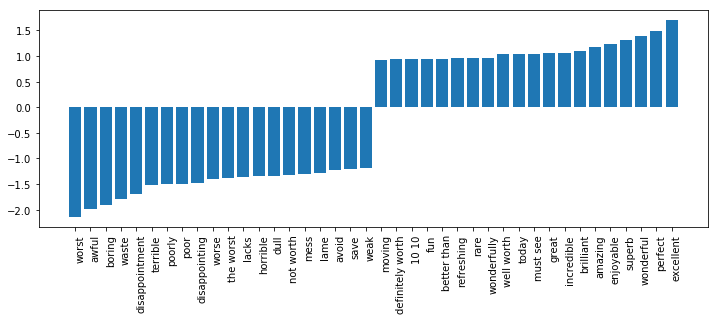

In [39]:
w = model.coef_[0]
indexer = w.argsort()

pos = np.r_[indexer[:20],indexer[-20:]]

plt.figure(figsize=[12,4])
plt.bar(range(40),w[pos])
plt.xticks(range(40), fn[pos], rotation=90, ha='left')
print('')

In [48]:
#mask = (np.array([len(s.split(' ')) for s in fn]) == 2)
mask = np.array([s.find(' ')>=0 for s in fn])

In [49]:
w2 = w[mask]
indexer = w2.argsort()

In [50]:
fn2 = fn[mask]

array(['00 01', '00 after', '00 alison', '00 am', '00 and', '00 at',
       '00 back', '00 bin', '00 budget', '00 but'], dtype='<U89')

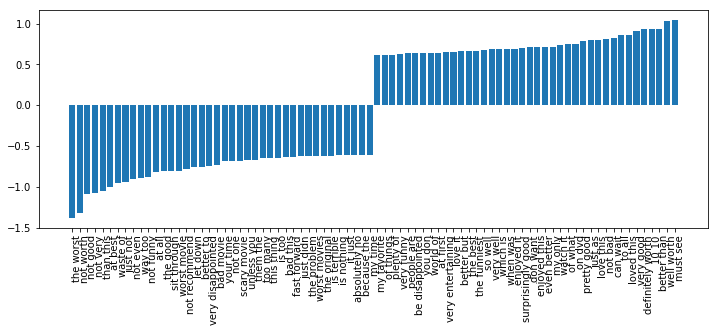

In [60]:
plt.figure(figsize=[12,4])
plt.bar(range(80),w2[np.r_[indexer[:40],indexer[-40:]]])
plt.xticks(range(80), fn2[np.r_[indexer[:40],indexer[-40:]]], rotation=90, ha='left')
print('')

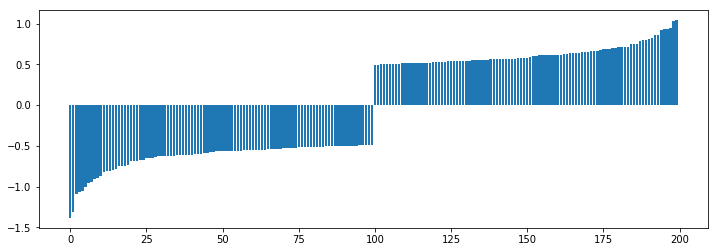

In [52]:
plt.figure(figsize=[12,4])
plt.bar(range(200),w2[np.r_[indexer[:100],indexer[-100:]]])
#plt.xticks(range(80), fn2[np.r_[indexer[:40],indexer[-40:]]], rotation=90, ha='left')
print('')